In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from kid_readout.measurement import plot_basic
from kid_readout.measurement.io import npy

In [2]:
npd = npy.NumpyDirectory('/data/readout/2017-12-02_144439_test.npd/')

In [3]:
print(npd.metadata.script_code)

"""
Measure one group of resonances simultaneously.
"""
from __future__ import division
import time

import numpy as np

from kid_readout.roach import analog, hardware_tools, tools
from kid_readout.measurement import acquire, basic
from kid_readout.equipment import hardware, starcryo_temps
from equipment.srs import lockin
from equipment.custom import mmwave_source
from kid_readout.settings import LOCKIN_SERIAL_PORT, CRYOGENIC_HWP_MOTOR_SERIAL_PORT
import resonances

acquire.show_settings()
acquire.show_git_status()
logger = acquire.get_script_logger(__file__)

# Parameters
suffix = 'test'
attenuations = [20]
df_baseband_target = 30e3
f_sweep_span = 3e6  # The total span of the sweeps
f_lo_spacing = 2.5e3  # This is the smallest resolution available
f_baseband_minimum = 10e6  # Keep the tones away from the LO by at least this frequency.
f_baseband_maximum = 200e6  # Place dummy tones above this frequency
sweep_length_seconds = 0.01
stream_length_seconds = 10

# Resonance frequencies
ban

In [4]:
npd.node_names()

['SweepStreamArray0', 'ADCSnap1']

In [5]:
all_ssa = [npd.read(name) for name in npd.node_names() if name.startswith('SweepStreamArray')]

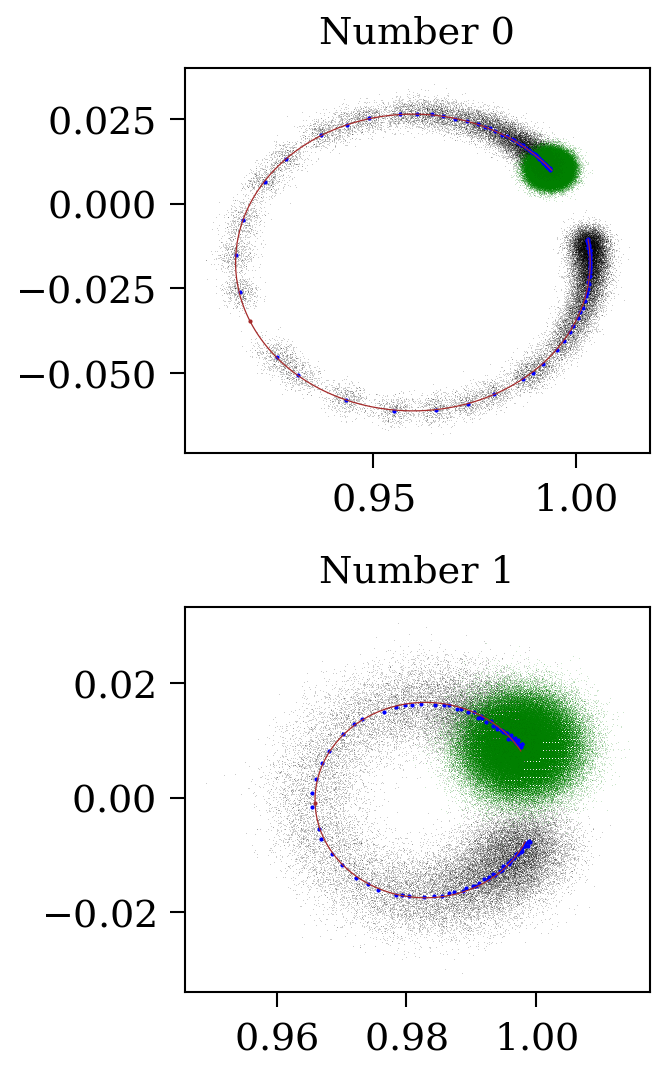

In [6]:
index = 0
ssa = all_ssa[index]
num_resonators = ssa.num_channels - ssa.state.num_dummy_frequencies
fig, axes = plt.subplots(num_resonators, 1, figsize=(2, 2 * num_resonators), gridspec_kw={'hspace': 0.4})
for number, ax in enumerate(axes.flatten()):
    plot_basic.sss_complex_plane(axis=ax, sss=ssa[number])
    ax.set_title("Number {:d}".format(number))